

# Project Title: Famous paintings Analysis

# Data analyazed by:-
#### Ankita Bugga    - AF0363380
#### Chaitali Pandharpure     -AF0402513

# Problem Statement:
#### The art market often lacks a clear understanding of relationships between artists, their artworks, and pricing. This project aims to analyze data from various sources to uncover trends in artwork production, pricing by canvas size, and the distribution of artworks across museums, facilitating better insights for collectors, curators, and art enthusiasts.








# Objectives:
## Data Organization:

#### Combine data from different tables that contain information about artists, artworks, museums, canvas sizes, and prices.
## Artworks and Artists Insights:

#### Find out how many artworks each artist has created.
 ####  Identify the top 10 artists with the most artworks.
####  See how many artworks are in each museum and in different cities.
## Price and Size Analysis:

#### Explore how artwork prices are related to the size of the canvas.
#### Calculate and compare the average sale price and regular price for artworks based on their size.
## Subject and Museum Data:

#### Look at the most common themes or subjects in the artworks.
#### Analyze which museums hold the most artworks and where they are located.
## Visual Presentations:

### Create charts and graphs to show key findings like:
#### The number of artworks in each museum.
#### Average artwork prices based on canvas size.
#### The most popular subjects in the artworks.
#### The top 10 artists with the most works.
#### Museums grouped by city and their collection sizes.



# Database Table Structure

## 1) artist

#### artist_id: Unique identifier for each artist (Primary Key).
#### full_name: Complete name of the artist (Unique).
#### first_name: Artist's first name.
#### middle_names: Artist's middle names (optional).
#### last_name: Artist's last name.
#### nationality: Nationality of the artist.
#### style: Artistic style or movement associated with the artist.
#### birth: Year of birth of the artist.
#### death: Year of death of the artist (optional).


## 2) museum

#### museum_id: Unique identifier for each museum (Primary Key).
#### name: Name of the museum (Unique).
#### address: Physical address of the museum.
#### city: City where the museum is located.
#### state: State where the museum is located.
#### postal: Postal code for the museum.
#### country: Country where the museum is located.
#### phone: Contact phone number for the museum (Unique)

## 3) canvas_size
#### size_id: Unique identifier for each canvas size (Primary Key).
#### width: Width of the canvas in specified units (e.g., cm or inches).
#### height: Height of the canvas in specified units.
#### label: Descriptive label for the canvas size (Unique).

## 4) museum_house
#### museum_id: Identifier linking to the museum (Foreign Key).
#### day: Day of the week (e.g., Monday, Tuesday).
#### open: Opening time of the museum for that day.
#### close: Closing time of the museum for that day.
#### Primary Key: Combination of museum_id and day.
### Foreign Keys: 
#### museum_id references museum(museum_id)

## 5) work
#### work_id: Unique identifier for each artwork (Primary Key).
#### name: Title of the artwork.
#### artist_id: Identifier linking to the artist who created the artwork (Foreign Key).
#### museum_id: Identifier linking to the museum where the artwork is exhibited (Foreign Key).
### Foreign Keys: 
#### artist_id references artist(artist_id),
#### museum_id references museum(museum_id)

### 6) subject
#### work_id: Identifier linking to the associated artwork (Foreign Key).
#### subject: Subject or theme of the artwork.
#### Primary Key: Combination of work_id and subject.
### Foreign Key: 
#### work_id references work(work_id)

### 7) product_price
#### work_id: Identifier linking to the associated artwork (Foreign Key).
#### size_id: Identifier linking to the canvas size (Foreign Key).
#### sale_price: Sale price of the artwork.
#### regular_price: Regular price of the artwork.
#### Primary Key: Combination of work_id and size_id.

### Foreign Keys: 
#### work_id references work(work_id),
#### size_id references canvas_size(size_id)


## Import Libraries 

In [1]:
# Import required libraries
import mysql.connector  # For connecting to MySQL
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

## Database Connectivity

In [2]:
# Establish a connection to the MySQL database

connection=mysql.connector.connect(
    user='root',
    password='security',
    host='localhost',
    database='famous_paintings'
)

## Create a cursor object

In [3]:
# Create a cursor object
cursor = connection.cursor()


##   function to retrieve data from MySQL and convert to pandas DataFrame

In [4]:
# Helper function to retrieve data from MySQL and convert to pandas DataFrame
def fetch_data(query, cursor):
    cursor.execute(query)
    return pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

## Fetch data from SQL tables

In [6]:
# Fetch data from the 'artist' table
artist_data = fetch_data("SELECT * FROM artist", cursor)
print(artist_data)

# Fetch data from the 'canvas_size' table
canvasize_data = fetch_data("SELECT * FROM canvas_size", cursor)
print (canvasize_data)

# Fetch data from the 'museum' table
museum_data = fetch_data("SELECT * FROM museum", cursor)
print(museum_data)
# Fetch data from the 'museum_house' table
museumhouse_data = fetch_data("SELECT * FROM museum_house", cursor)
print(museumhouse_data)
# Fetch data from the 'work' table
work_data = fetch_data("SELECT * FROM work", cursor)
print(work_data)
# Fetch data from the 'subject' table
subject_data = fetch_data("SELECT * FROM subject", cursor)
print(subject_data )
# Fetch data from the 'product_price' table
product_data = fetch_data("SELECT * FROM product_price", cursor)
print(product_data)

    artist_id                     full_name  first_name middle_names  \
0           1         Pierre-Auguste Renoir      Pierre      Auguste   
1           2         Lemuel Francis Abbott      Lemuel      Francis   
2           3           Eugène-Louis Boudin      Eugene        Louis   
3           4            Asher Brown Durand       Asher        Brown   
4           5          George Henry Laporte      George        Henry   
5           6           John Francis Rigaud        John      Francis   
6           7       John William Waterhouse        John      William   
7           8       Francis William Edmonds     Francis      William   
8           9           Frank Weston Benson      Benson        Frank   
9          10           Gustaf Wilhelm Palm      Gustaf      Wilhelm   
10         11          Edward William Cooke      Edward      William   
11         12         George Wesley Bellows      George       Wesley   
12         13           Alfred Henry Maurer      Alfred        H

 ## Data Cleaning

####  Missing values

In [8]:
# Checking for missing values in artist_data
missing_values = artist_data.isnull().sum()
print("Missing values in artist_data:")
print(missing_values)

# Checking for missing values in canvasize_data
missing_values = canvasize_data.isnull().sum()
print("\nMissing values in canvasize_data:")
print(missing_values)

# Checking for missing values in museum_data
missing_values = museum_data.isnull().sum()
print("\nMissing values in museum_data:")
print(missing_values)

# Checking for missing values in museumhouse_data
missing_values = museumhouse_data.isnull().sum()
print("\nMissing values in museumhouse_data:")
print(missing_values)

# Checking for missing values in work_data
missing_values = work_data.isnull().sum()
print("\nMissing values in work_data:")
print(missing_values)

# Checking for missing values in subject_data
missing_values = subject_data.isnull().sum()
print("\nMissing values in subject_data:")
print(missing_values)

# Checking for missing values in product_data
missing_values = product_data.isnull().sum()
print("\nMissing values in product_data:")
print(missing_values)


Missing values in artist_data:
artist_id       0
full_name       0
first_name      0
middle_names    0
last_name       0
nationality     0
style           0
birth           0
death           0
dtype: int64

Missing values in canvasize_data:
size_id    0
width      0
height     0
label      0
dtype: int64

Missing values in museum_data:
museum_id    0
name         0
address      0
city         0
state        0
postal       0
country      0
phone        0
dtype: int64

Missing values in museumhouse_data:
museum_id    0
day          0
open         0
close        0
dtype: int64

Missing values in work_data:
work_id      0
name         0
artist_id    0
museum_id    0
dtype: int64

Missing values in subject_data:
work_id    0
subject    0
dtype: int64

Missing values in product_data:
work_id          0
size_id          0
sale_price       0
regular_price    0
dtype: int64


####  Handling duplicate values

In [9]:
# Checking for duplicate rows in artist_data
duplicates = artist_data.duplicated().sum()
print("Duplicate rows in artist_data:", duplicates)

# Checking for duplicate rows in canvasize_data
duplicates = canvasize_data.duplicated().sum()
print("\nDuplicate rows in canvasize_data:", duplicates)

# Checking for duplicate rows in museum_data
duplicates = museum_data.duplicated().sum()
print("\nDuplicate rows in museum_data:", duplicates)

# Checking for duplicate rows in museumhouse_data
duplicates = museumhouse_data.duplicated().sum()
print("\nDuplicate rows in museumhouse_data:", duplicates)

# Checking for duplicate rows in work_data
duplicates = work_data.duplicated().sum()
print("\nDuplicate rows in work_data:", duplicates)

# Checking for duplicate rows in subject_data
duplicates = subject_data.duplicated().sum()
print("\nDuplicate rows in subject_data:", duplicates)

# Checking for duplicate rows in product_data
duplicates = product_data.duplicated().sum()
print("\nDuplicate rows in product_data:", duplicates)


Duplicate rows in artist_data: 0

Duplicate rows in canvasize_data: 0

Duplicate rows in museum_data: 0

Duplicate rows in museumhouse_data: 0

Duplicate rows in work_data: 0

Duplicate rows in subject_data: 0

Duplicate rows in product_data: 0


## Data View

In [10]:
# Displaying information about artist_data
print("Information about artist_data:")
print(artist_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about canvasize_data
print("Information about canvasize_data:")
print(canvasize_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about museum_data
print("Information about museum_data:")
print(museum_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about museumhouse_data
print("Information about museumhouse_data:")
print(museumhouse_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about work_data
print("Information about work_data:")
print(work_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about subject_data
print("Information about subject_data:")
print(subject_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about product_data
print("Information about product_data:")
print(product_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity


Information about artist_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     50 non-null     int64 
 1   full_name     50 non-null     object
 2   first_name    50 non-null     object
 3   middle_names  50 non-null     object
 4   last_name     50 non-null     object
 5   nationality   50 non-null     object
 6   style         50 non-null     object
 7   birth         50 non-null     int64 
 8   death         50 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 3.6+ KB
None


Information about canvasize_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   size_id  50 non-null     int64 
 1   width    50 non-null     object
 2   height   50 non-null     object
 3   label    50 non-null  

In [11]:
# Display the first few rows of the Artist Data
print("Artist Data:")
print(artist_data.head())

# Display the first few rows of the Canvas Size Data
print("\nCanvas Size Data:")
print(canvasize_data.head())

# Display the first few rows of the Museum Data
print("\nMuseum Data:")
print(museum_data.head())

# Display the first few rows of the Museum House Data
print("\nMuseum House Data:")
print(museumhouse_data.head())

# Display the first few rows of the Work Data
print("\nWork Data:")
print(work_data.head())

# Display the first few rows of the Subject Data
print("\nSubject Data:")
print(subject_data.head())

# Display the first few rows of the Product Data
print("\nProduct Data:")
print(product_data.head())


Artist Data:
   artist_id              full_name first_name middle_names last_name  \
0          1  Pierre-Auguste Renoir     Pierre      Auguste    Renoir   
1          2  Lemuel Francis Abbott     Lemuel      Francis    Abbott   
2          3    Eugène-Louis Boudin     Eugene        Louis    Boudin   
3          4     Asher Brown Durand      Asher        Brown    Durand   
4          5   George Henry Laporte     George        Henry   Laporte   

  nationality                style  birth  death  
0      French        Impressionist   1841   1919  
1     English          Portraitist   1760   1803  
2      French        Impressionist   1824   1898  
3    American  Hudson River School   1796   1886  
4     English              Realist   1799   1873  

Canvas Size Data:
   size_id  width height                      label
0        1  15.00  22.00  15" x 22" (38 cm x 56 cm)
1        2  16.00  18.00  16" x 18" (41 cm x 46 cm)
2        3  16.00  20.00  16" x 20" (41 cm x 51 cm)
3        4  16.

# Printing the Shape of  Datasets

In [12]:
# Printing the shape of artist_data
print("Shape of artist_data:", artist_data.shape)

# Printing the shape of canvasize_data
print("Shape of canvasize_data:", canvasize_data.shape)

# Printing the shape of museum_data
print("Shape of museum_data:", museum_data.shape)

# Printing the shape of museumhouse_data
print("Shape of museumhouse_data:", museumhouse_data.shape)

# Printing the shape of work_data
print("Shape of work_data:", work_data.shape)

# Printing the shape of subject_data
print("Shape of subject_data:", subject_data.shape)

# Printing the shape of product_data
print("Shape of product_data:", product_data.shape)


Shape of artist_data: (50, 9)
Shape of canvasize_data: (50, 4)
Shape of museum_data: (33, 8)
Shape of museumhouse_data: (50, 4)
Shape of work_data: (51, 4)
Shape of subject_data: (50, 2)
Shape of product_data: (50, 4)


##  Descriptive Statistics for Multiple Data Tables

In [22]:

# Displaying descriptive statistics for artist_data
artist_description = artist_data.describe()
print("Descriptive statistics for artist_data:")
print(artist_description)

# Displaying descriptive statistics for canvasize_data
canvasize_description = canvasize_data.describe()
print("\nDescriptive statistics for canvasize_data:")
print(canvasize_description)

# Displaying descriptive statistics for museum_data
museum_description = museum_data.describe()
print("\nDescriptive statistics for museum_data:")
print(museum_description)

# Displaying descriptive statistics for museumhouse_data
museumhouse_description = museumhouse_data.describe()
print("\nDescriptive statistics for museumhouse_data:")
print(museumhouse_description)

# Displaying descriptive statistics for work_data
work_description = work_data.describe()
print("\nDescriptive statistics for work_data:")
print(work_description)

# Displaying descriptive statistics for subject_data
subject_description = subject_data.describe()
print("\nDescriptive statistics for subject_data:")
print(subject_description)

# Displaying descriptive statistics for product_data
product_description = product_data.describe()
print("\nDescriptive statistics for product_data:")
print(product_description)


Descriptive statistics for artist_data:
       artist_id        birth        death
count   50.00000    50.000000    50.000000
mean    25.50000  1795.980000  1863.420000
std     14.57738    74.669473    76.084832
min      1.00000  1544.000000  1589.000000
25%     13.25000  1768.000000  1825.250000
50%     25.50000  1811.000000  1886.500000
75%     37.75000  1848.750000  1915.750000
max     50.00000  1882.000000  1951.000000

Descriptive statistics for canvasize_data:
        size_id
count  50.00000
mean   25.50000
std    14.57738
min     1.00000
25%    13.25000
50%    25.50000
75%    37.75000
max    50.00000

Descriptive statistics for museum_data:
       museum_id
count   33.00000
mean    17.00000
std      9.66954
min      1.00000
25%      9.00000
50%     17.00000
75%     25.00000
max     33.00000

Descriptive statistics for museumhouse_data:
       museum_id                       open                      close
count  50.000000                         50                         50
mea

 ## Data Visualization

In [23]:
# Merge work_data and artist_data to analyze artworks by artists
artist_work_data = pd.merge(work_data, artist_data, on='artist_id', how='inner')
print("\nMerged Artist and Work Data:")
print(artist_work_data.head())


Merged Artist and Work Data:
   work_id                                               name  artist_id  \
0        1                Still Life with Flowers and a Watch          1   
1        2  Still Life with Fruit and a Beaker on a Cock's...          2   
2        3              Still Life with Fruit and a Goldfinch          3   
3        4                  Still Life with Fruit and Oysters          4   
4        5  Still Life with Fruit, Oysters, and a Porcelai...          5   

   museum_id              full_name first_name middle_names last_name  \
0          1  Pierre-Auguste Renoir     Pierre      Auguste    Renoir   
1          2  Lemuel Francis Abbott     Lemuel      Francis    Abbott   
2          3    Eugène-Louis Boudin     Eugene        Louis    Boudin   
3          4     Asher Brown Durand      Asher        Brown    Durand   
4          5   George Henry Laporte     George        Henry   Laporte   

  nationality                style  birth  death  
0      French        Im

In [24]:
#  Count artworks by each artist
artwork_count_by_artist = artist_work_data.groupby('full_name')['work_id'].count().reset_index().rename(columns={'work_id': 'artwork_count'})
print("\nArtworks Count by Artist:")
print(artwork_count_by_artist)


Artworks Count by Artist:
                       full_name  artwork_count
0           Adriaen Thomasz. Key              1
1        Adélaïde Labille-Guiard              1
2            Alfred Henry Maurer              1
3        Alfred Thompson Bricher              1
4              Antoine-Jean Gros              1
5             Asher Brown Durand              1
6                      Canaletto              1
7         Caspar David Friedrich              1
8             Charles Caleb Ward              1
9         Charles Marion Russell              1
10            Charles Peale Polk              1
11        Charles Sprague Pearce              1
12     Constantin A. Westchiloff              1
13          Edward William Cooke              1
14           Eugène-Louis Boudin              1
15             Francis Luis Mora              1
16       Francis William Edmonds              1
17           Frank Weston Benson              1
18              Frans Jansz Post              1
19          G

In [26]:
#  Join work_data, productdata, and canvasize_data to analyze size and pricing information
artwork_size_price_data = pd.merge(pd.merge(work_data, product_data, on='work_id'), canvasize_data, on='size_id')
print("\nArtwork Size and Price Data:")
print(artwork_size_price_data.head())


Artwork Size and Price Data:
   work_id                                               name  artist_id  \
0        1                Still Life with Flowers and a Watch          1   
1        1                Still Life with Flowers and a Watch          1   
2        2  Still Life with Fruit and a Beaker on a Cock's...          2   
3        3              Still Life with Fruit and a Goldfinch          3   
4        4                  Still Life with Fruit and Oysters          4   

   museum_id  size_id sale_price regular_price  width height  \
0          1        1      85.00         85.00  15.00  22.00   
1          1       17     305.00        535.00  21.00  29.00   
2          2        2      95.00         95.00  16.00  18.00   
3          3        3      85.00         85.00  16.00  20.00   
4          4        4      95.00         95.00  16.00  23.00   

                       label  
0  15" x 22" (38 cm x 56 cm)  
1  21" x 29" (53 cm x 74 cm)  
2  16" x 18" (41 cm x 46 cm)  
3  1

# Average Sale and Regular Price by Canvas Size

In [27]:
# Calculate average price for artworks based on canvas size (size_id)
average_price_by_size = artwork_size_price_data.groupby('size_id')[['sale_price', 'regular_price']].mean().reset_index()

print("\nAverage Sale and Regular Price by Canvas Size (size_id):")
print(average_price_by_size)



Average Sale and Regular Price by Canvas Size (size_id):
    size_id sale_price regular_price
0         1      230.0         380.0
1         2      250.0         415.0
2         3      290.0         500.0
3         4      385.0         685.0
4         5      445.0         810.0
5         6       95.0          95.0
6         7       85.0          85.0
7         8      200.0         315.0
8         9      200.0         325.0
9        10      235.0         385.0
10       11      245.0         410.0
11       12      295.0         505.0
12       13      385.0         685.0
13       14      445.0         810.0
14       15      200.0         315.0
15       16      205.0         330.0
16       17      340.0         605.0
17       18      405.0         735.0
18       19      495.0         915.0
19       20      675.0        1275.0
20       21      805.0        1535.0
21       22       95.0          95.0
22       23       85.0          85.0
23       24      335.0         595.0
24       25      

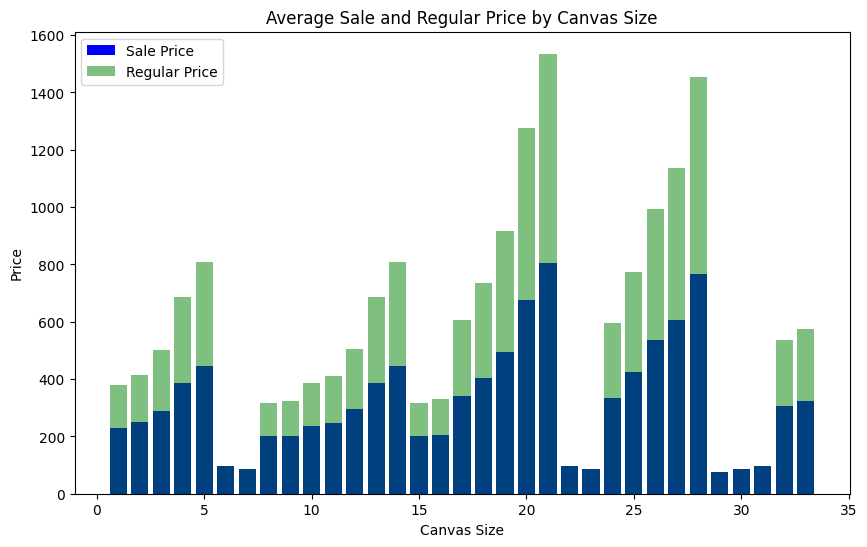

In [45]:
# Visualization: Average sale and regular price by canvas size
ple('Average Sale and Regular Price by Canvas Size')
plt.legend()
plt.show()lt.figure(figsize=(10, 6))
plt.bar(average_price_by_size['size_id'], average_price_by_size['sale_price'], color='blue', label='Sale Price')
plt.bar(average_price_by_size['size_id'], average_price_by_size['regular_price'], color='green', label='Regular Price', alpha=0.5)
plt.xlabel('Canvas Size')
plt.ylabel('Price')
plt.tit

This bar chart shows the canvas size and prices of different sizes of canvas with vary different price prices which is differentiate from sales price and regular price

## Insights:
#### Larger canvas sizes (Size IDs 20, 21, 28) tend to command higher prices, suggesting a premium for larger artworks.
#### Some smaller canvas sizes (e.g., Size IDs 6, 7, 22) are priced consistently low, likely indicating mass production or lower market value.
#### There is a noticeable trend where sale prices are generally lower than regular prices, which reflects typical discount patterns for artworks.

#### Here is the chart visualizing the Average Sale Price and Average Regular Price by canvas size (size_id).

#### The blue bars represent the sale prices, while the green bars indicate the regular prices.

# Number of Artworks in Each Museum

In [35]:
# Merge museum_data and work_data to analyze which museum has how many artworks
museum_work_data = pd.merge(work_data,museum_data, on='museum_id')

# Check the columns of the merged DataFrame
print("Columns in Merged DataFrame:")
print(museum_work_data.columns)

# Use the correct column name for the museum name
museum_artwork_count = museum_work_data.groupby('name_y')['work_id'].count().reset_index().rename(columns={'work_id': 'artwork_count'})

print("\nArtworks Count by Museum:")
print(museum_artwork_count)



Columns in Merged DataFrame:
Index(['work_id', 'name_x', 'artist_id', 'museum_id', 'name_y', 'address',
       'city', 'state', 'postal', 'country', 'phone'],
      dtype='object')

Artworks Count by Museum:
                                               name_y  artwork_count
0                              Chrysler Museum of Art              1
1                             Cleveland Museum Of Art              2
2                              Columbus Museum of Art              1
3                                   Courtauld Gallery              1
4                                Dallas Museum of Art              1
5   Fine Arts Museums of San Francisco Legion of H...              1
6                          Indianapolis Museum of Art              2
7                                  Kimbell Art Museum              1
8                    Los Angeles County Museum of Art              2
9                          Museum of Fine Arts Boston              2
10                       Museum o

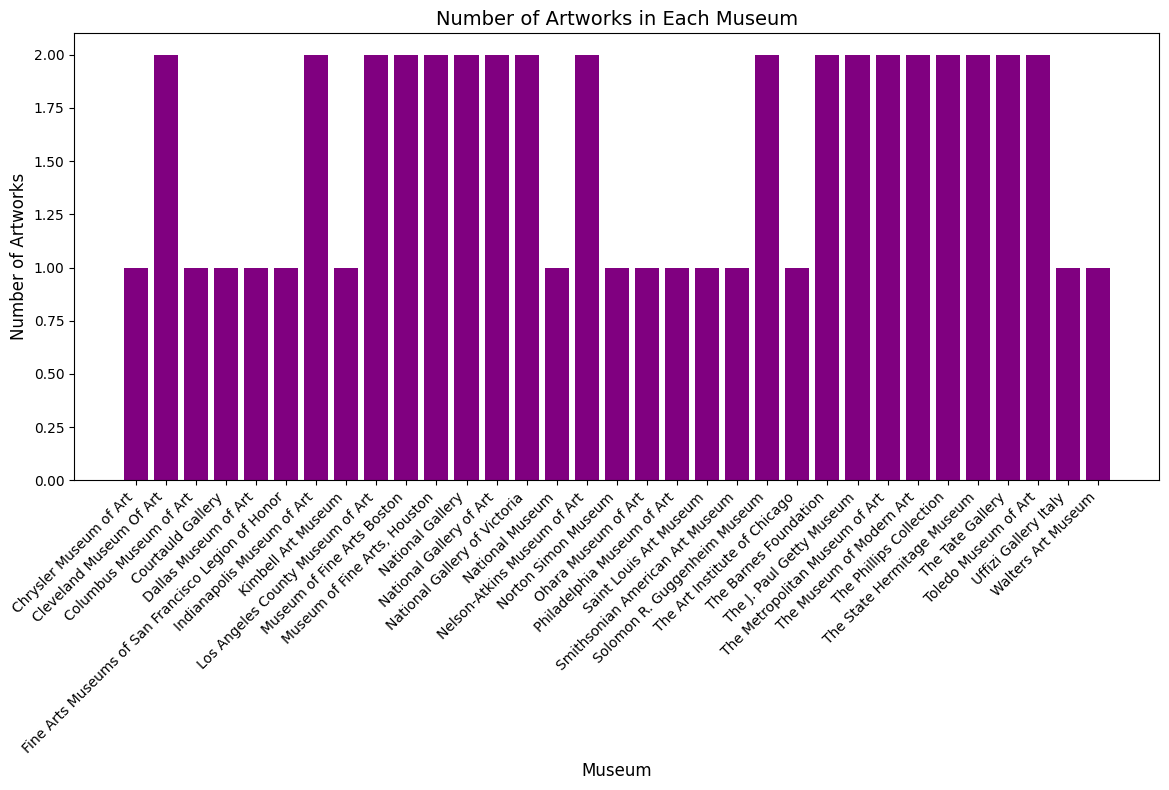

In [36]:
# Visualization: Number of artworks per museum
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
plt.bar(museum_artwork_count['name_y'], museum_artwork_count['artwork_count'], color='purple')

plt.xlabel('Museum', fontsize=12)
plt.ylabel('Number of Artworks', fontsize=12)
plt.title('Number of Artworks in Each Museum', fontsize=14)

# Rotate x-tick labels for better readability and adjust size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Limit the number of x-ticks displayed
plt.xticks(ticks=range(len(museum_artwork_count)), labels=museum_artwork_count['name_y'], rotation=45)

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()




This bar chart shows number of artworks as per different museums.

## Insights:
####  Museums such as the Cleveland Museum Of Art, Indianapolis Museum of Art, and Museum of Fine Arts, Boston showcase a more extensive collection, each housing 2 artworks, indicating a diverse range of works from different artists.
####  The majority of museums have around 1-2 artworks.

# Number of Artworks by Subject

In [37]:
#  Analysis of subjects related to artworks
subject_work_data = pd.merge(work_data, subject_data, on='work_id')
subject_artwork_count = subject_work_data.groupby('subject')['work_id'].count().reset_index().rename(columns={'work_id': 'artwork_count'})
print("\nArtworks Count by Subject:")
print(subject_artwork_count)


Artworks Count by Subject:
           subject  artwork_count
0          Dancers              1
1             Dogs              1
2           Horses              2
3           Musics              2
4        Portraits             36
5     Rivers/Lakes              7
6  U.S. Presidents              1


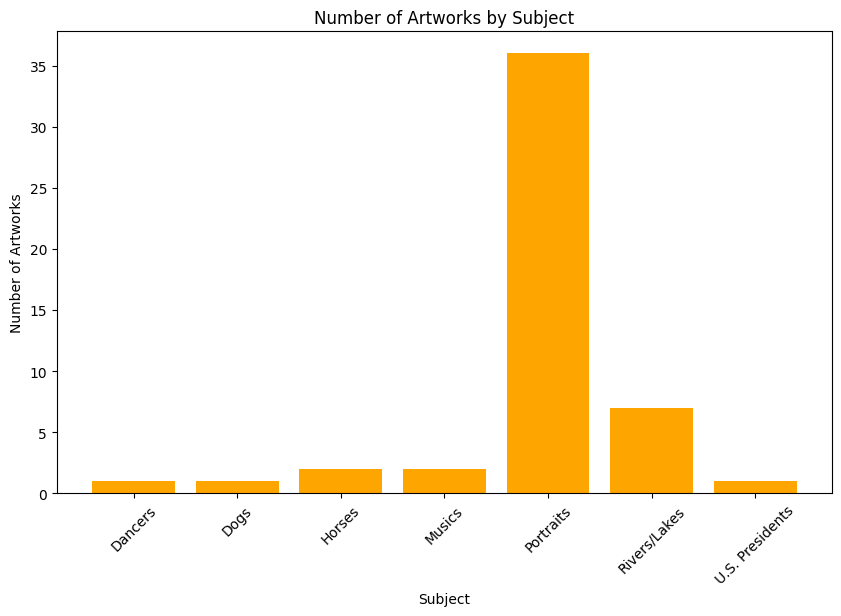

In [38]:
# Visualization: Artworks by subject
plt.figure(figsize=(10, 6))
plt.bar(subject_artwork_count['subject'], subject_artwork_count['artwork_count'], color='orange')
plt.xlabel('Subject')
plt.ylabel('Number of Artworks')
plt.title('Number of Artworks by Subject')
plt.xticks(rotation=45)
plt.show()

This bar chart shows basically how many arts is present by subject like dancers,dogs etc

## Insights:
#### Portraits are the most common subject, with 36 artworks, indicating a strong interest or focus on this theme among artists.
#### Rivers/Lakes have a moderate representation with 7 artworks, showing some diversity in subject matter.
#### Other subjects like Horses and Musics each have 2 artworks, while subjects like Dancers, Dogs, and U.S. Presidents are less represented with only 1 artwork each.

# Top 10 Artists by Number of Works

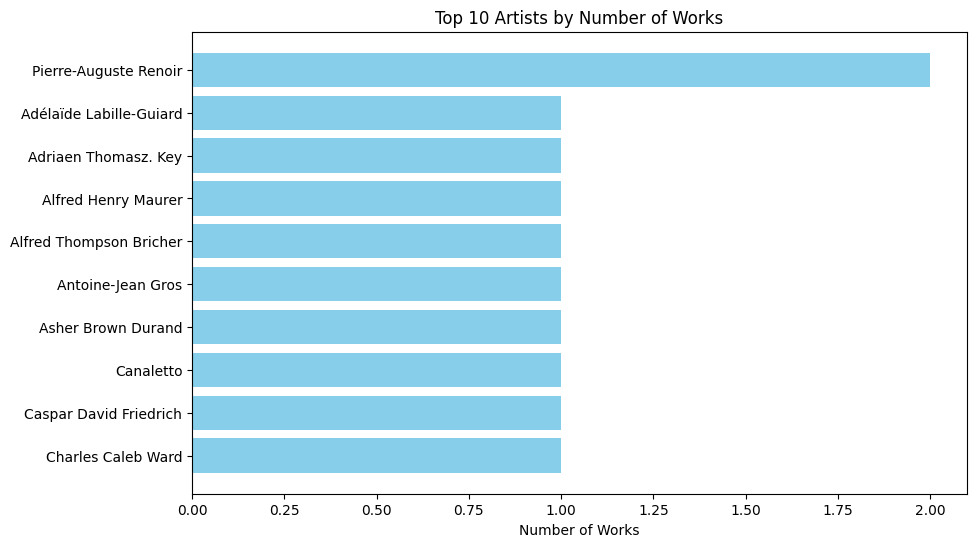

In [43]:
# Query execution for top artists
artist_query = """
SELECT a.full_name, COUNT(w.work_id) AS work_count
FROM artist a
JOIN work w ON a.artist_id = w.artist_id
GROUP BY a.full_name
ORDER BY work_count DESC
LIMIT 10;
"""
top_artists = fetch_data(artist_query, cursor)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_artists['full_name'], top_artists['work_count'], color='skyblue')
plt.xlabel('Number of Works')
plt.title('Top 10 Artists by Number of Works')
plt.gca().invert_yaxis()
plt.show()


this bar plot plots top 10 artists and their number of work

#### Insights:
#### Pierre-Auguste Renoir stands out as the most  artist in this dataset, with two works attributed to him.
#### The other artists listed, including Adélaïde Labille-Guiard and Adriaen Thomasz. Key, each have only one work, suggesting a diverse representation of artists.

# Distribution of Museums by City

             city  museum_count
0        New York             3
1       Melbourne             1
2     Kansas City             2
3          Boston             1
4      Washington             3
5          London             2
6    Philadelphia             2
7       Cleveland             1
8         Houston             1
9     Los Angeles             2
10         Toledo             1
11   Indianapolis             1
12  San Francisco             1
13        Chicago             1
14       St Louis             1
15        Firenze             1
16      Kurashiki             1
17      Baltimore             1
18        Cardiff             1
19       Columbus             1
20     Fort Worth             1
21         Dallas             1
22        Norfolk             1
23       Pasadena             1
24          Stran             1


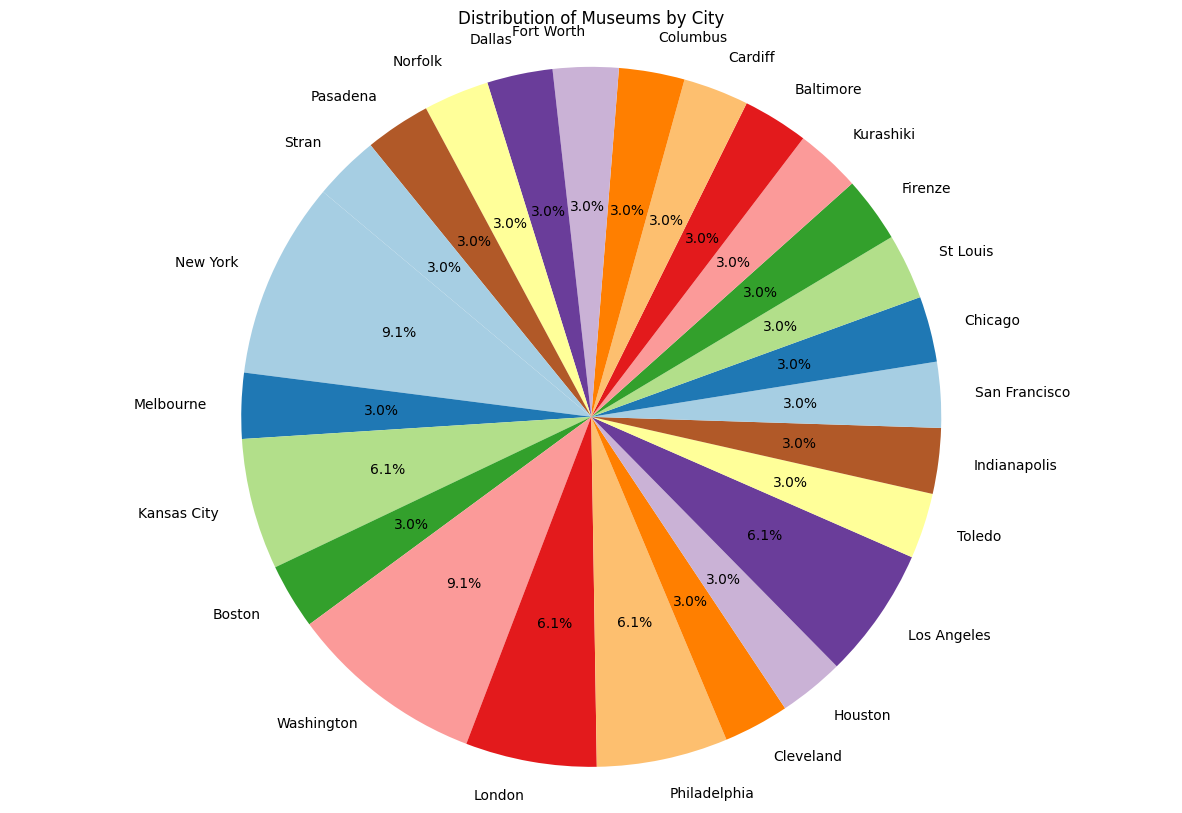

In [17]:
# Query execution for museum locations
location_query = """
SELECT city, COUNT(museum_id) AS museum_count
FROM museum
GROUP BY city;
"""
museum_locations = fetch_data(location_query, cursor)
print(museum_locations)

# Plotting Pie Chart
plt.figure(figsize=(15, 10))
plt.pie(museum_locations['museum_count'], labels=museum_locations['city'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Museums by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Insights 


#### New York and Washington each have the highest number of museums, with 3 museums each, indicating a rich cultural presence in these cities.
#### Cities like Kansas City, Los Angeles, and London follow with 2 museums, suggesting these locations also have a significant number of art institutions.


#### The pie chart shows that while some cities have multiple museums, many cities have only one. This reflects a diverse distribution of museums across various locations, with each city contributing to the overall cultural landscape.


# Average Sale Price by Canvas Size

                         label avg_sale_price
0    15" x 22" (38 cm x 56 cm)     230.000000
1    21" x 29" (53 cm x 74 cm)     340.000000
2    16" x 18" (41 cm x 46 cm)     250.000000
3    16" x 20" (41 cm x 51 cm)     290.000000
4    16" x 23" (41 cm x 58 cm)     385.000000
5    16" x 24" (41 cm x 61 cm)     445.000000
6    16" x 32" (41 cm x 81 cm)      95.000000
7    18" x 26" (46 cm x 66 cm)      85.000000
8    19" x 26" (48 cm x 66 cm)     200.000000
9    19" x 29" (48 cm x 74 cm)     200.000000
10   20" x 16" (51 cm x 41 cm)     235.000000
11   20" x 20" (51 cm x 51 cm)     245.000000
12   20" x 24" (51 cm x 61 cm)     295.000000
13   20" x 29" (51 cm x 74 cm)     385.000000
14   20" x 30" (51 cm x 76 cm)     445.000000
15  20" x 40" (51 cm x 102 cm)     200.000000
16   21" x 26" (53 cm x 66 cm)     205.000000
17   21" x 30" (53 cm x 76 cm)     405.000000
18   21" x 36" (53 cm x 91 cm)     495.000000
19   22" x 19" (56 cm x 48 cm)     675.000000
20   22" x 25" (56 cm x 64 cm)    

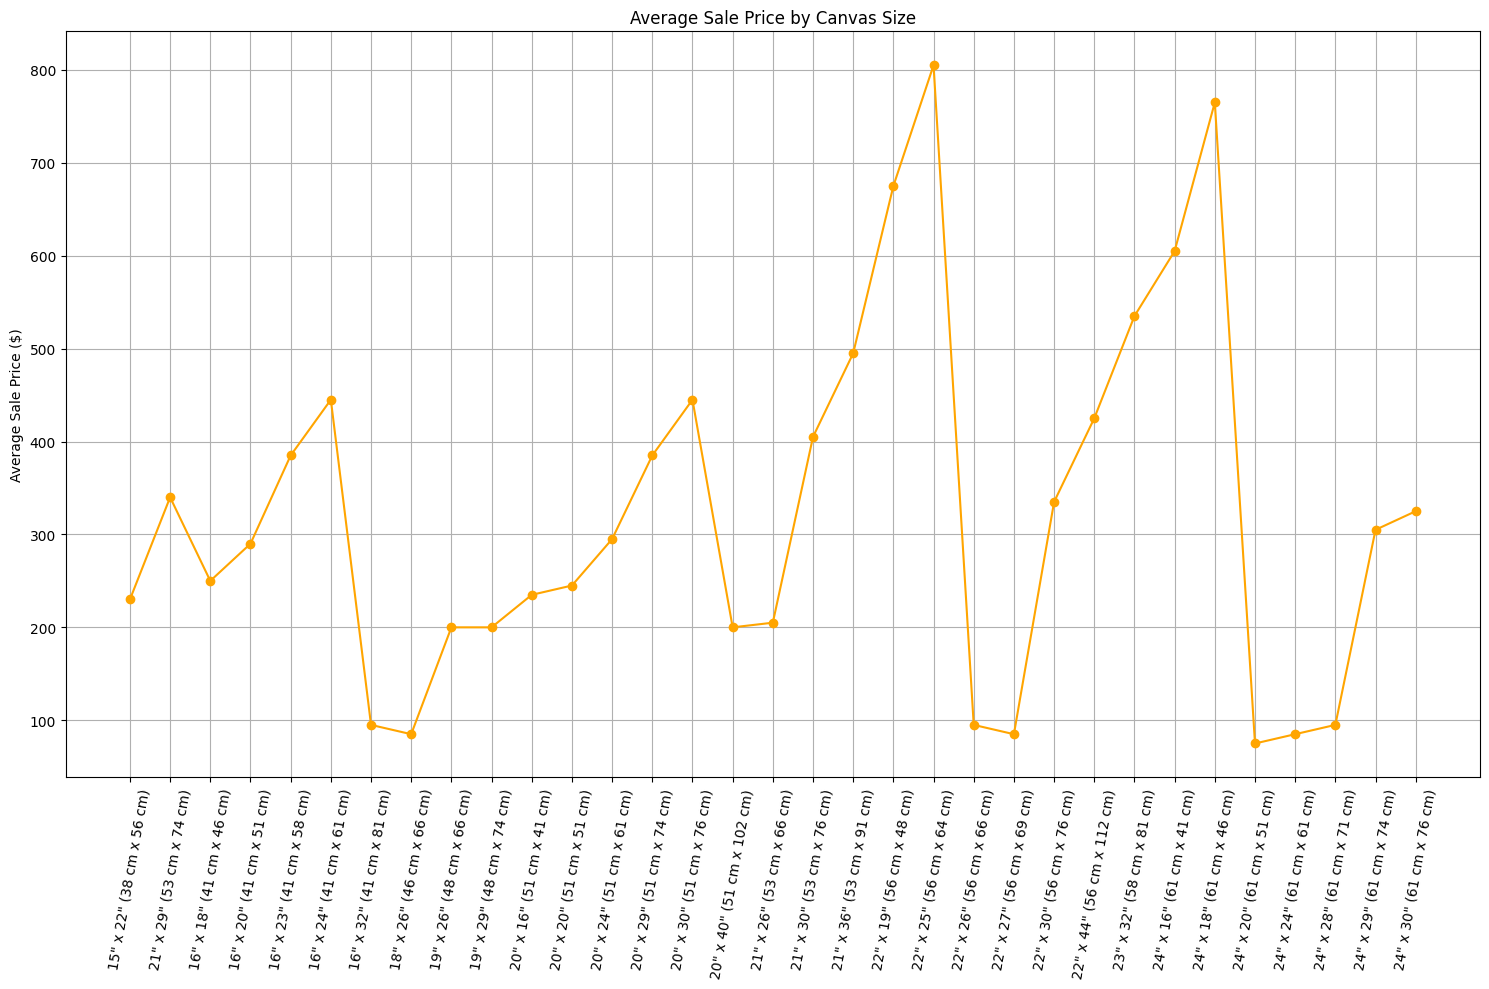

In [18]:
# Query execution for average sale price by canvas size
price_query = """
SELECT cs.label, AVG(pp.sale_price) AS avg_sale_price
FROM product_price pp
JOIN canvas_size cs ON pp.size_id = cs.size_id
GROUP BY cs.label;
"""
average_prices = fetch_data(price_query, cursor)
print (average_prices)

# Plotting Line Chart
plt.figure(figsize=(15, 10))
plt.plot(average_prices['label'], average_prices['avg_sale_price'], marker='o', linestyle='-', color='orange')
plt.ylabel('Average Sale Price ($)')
plt.title('Average Sale Price by Canvas Size')
plt.xticks(rotation=80)
plt.grid()
plt.tight_layout()
plt.show()


 this line chart shows the canvas price by thier  canvas  sizes.

##  Insights 


#### The largest average sale prices are observed for sizes such as 22" x 25" (805) and 22" x 19" (675), suggesting that these dimensions are favored in the market, potentially due to their visual impact and suitability for prominent display.

#### Smaller canvas sizes, such as 22" x 27" (85) and 22" x 26" (95), show much lower average sale prices, indicating that they might be less desirable or associated with less renowned artworks.


#### Sizes like 20" x 30" (445) and 20" x 24" (295) also maintain relatively high average prices.



# Conclusion

This project provides a structured analysis of famous paintings across various dimensions such as artist contributions, museum representation, artwork pricing, and subjects. The visualizations and insights will be helpful for art collectors, gallery owners, and museum curators to make informed decisions about acquisitions, exhibitions, and pricing strategies. The presentation will summarize these findings and provide a clear understanding of the art world dynamics.